Add different levels of Gaussian noises to a given image, observe the  
change of corresponding histograms (based on the program you  
developed above). And then process the Gaussian noise polluted  
images using your designed kernels to achieve desired effect. (Both  
code and result report are required.) 

이번엔 노이즈와 필터에 대해 간단히 알아보겠습니다.  
노이즈는 영상의 품질을 떨어뜨리는 주요 원인이죠.  

아무튼 가우시안 노이즈에 대해 간단히 알아봅시다.  
![title](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FCbW0g%2FbtqN005Ge5Y%2FkUVZpwTKpdhOETVC94CAkK%2Fimg.png)  
가우시안 노이즈가 첨가된 lenna  
출처:https://marisara.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-openCV-10-%EA%B0%80%EC%9A%B0%EC%8B%9C%EC%95%88-%EB%85%B8%EC%9D%B4%EC%A6%88Gaussian-Noise 

가우시안 노이즈라고 하는 이유는 가우시안 분포를 따르고 있기 때문입니다. 

![title](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fc7qJLd%2FbtqNWfQJ2vP%2Fcw9slJb8DvKK1kcKlEkke0%2Fimg.png)  

가우시안 노이즈는 보통 이미지의 압축, 전송 등의 과정에서 일어납니다.  
이미지가 압축되면서 이미지가 줄어들게 되고, 이후 다시 복구하는 과정에서 여러 가지 원인으로 인해 원래의 화소 값이 아닌, 오차가 생긴 값이 들어갈 수가 있습니다.  
그렇게 생기는 노이즈가 가우시안 노이즈입니다.
 
이미지가 전송될 때에도, 압축을 한 이후 전송을 하게 됩니다. 이때는 압축과 복원을 하는 과정에는 아무 문제가 없더라도, 전송 과정에서 오류가 발생하면 가우시안 노이즈가 생성될 수 있는 것입니다.  



In [36]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')


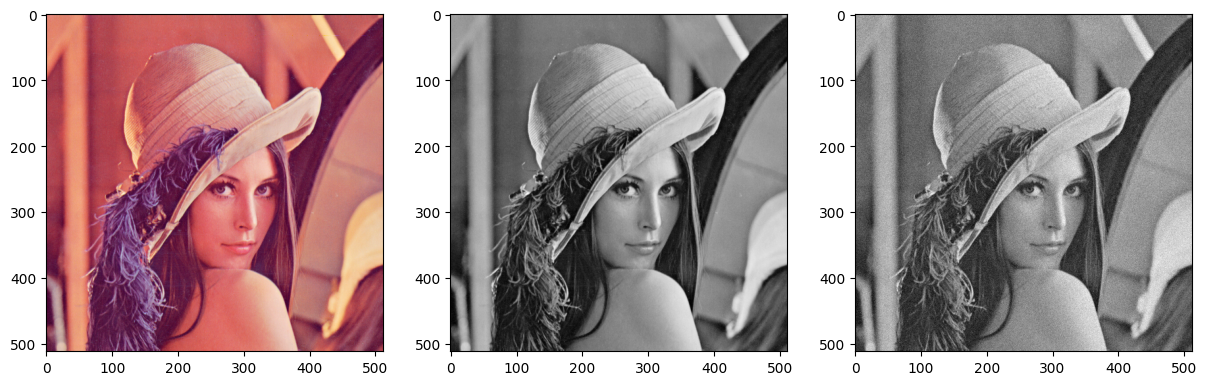

In [37]:

#img = cv2.imread('./Lenna.png')
#img =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.imread('./Lenna.png')
img =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
noise = np.zeros(gray.shape)

def make_noise(std, gray):
    height, width = gray.shape
    img_noise = np.zeros((height, width), dtype=np.float)
    for i in range(height):
        for a in range(width):
            make_noise = np.random.normal()  # 랜덤함수를 이용하여 노이즈 적용
            set_noise = std * make_noise
            noise[i][a] += set_noise
            img_noise[i][a] = gray[i][a] + set_noise
    return img_noise
std=10
img_noise = make_noise(std, gray)


fig = plt.figure(figsize=(20,8))
plt.subplot(1,4,1)
plt.imshow(img)
plt.subplot(1,4,2)
plt.imshow(gray,cmap='gray')
plt.subplot(1,4,3)
plt.imshow(img_noise,cmap='gray')
plt.show()


(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        4.000e+00, 5.000e+00, 4.000e+00, 5.000e+00, 1.200e+01, 1.500e+01,
        1.800e+01, 2.200e+01, 4.500e+01, 5.500e+01, 5.800e+01, 8.800e+01,
        1.000e+02, 1.260e+02, 2.030e+02, 2.170e+02, 3.080e+02, 3.940e+02,
        4.500e+02, 5.930e+02, 7.650e+02, 9.250e+02, 1.119e+03, 1.329e+03,
        1.520e+03, 1.834e+03, 2.066e+03, 2.403e+03, 2.883e+03, 3.275e+03,
        3.819e+03, 4.212e+03, 4.747e+03, 5.234e+03, 5.763e+03, 6.436e+03,
        6.775e+03, 7.339e+03, 7.839e+03, 8.036e+03, 8.526e+03, 8.744e+03,
        9.076e+03, 9.055e+03, 9.490e+03, 9.518e+03, 9.308e+03, 9.517e+03,
        8.968e+03, 8.728e+03, 8.479e+03, 8.373e+03, 7.915e+03, 7.297e+03,
        6.900e+03, 6.152e+03, 5.936e+03, 5.214e+03, 4.683e+03, 4.238e+03,
        3.727e+03, 3.477e+03, 2.807e+03, 2.453e+03, 2.289e+03, 1.843e+03,
        1.500e+03, 1.266e+03, 1.091e+03, 9.030e+02, 8.080e+02, 6.220e+02,
        4.730e+02, 4.030e+02, 3.090e+0

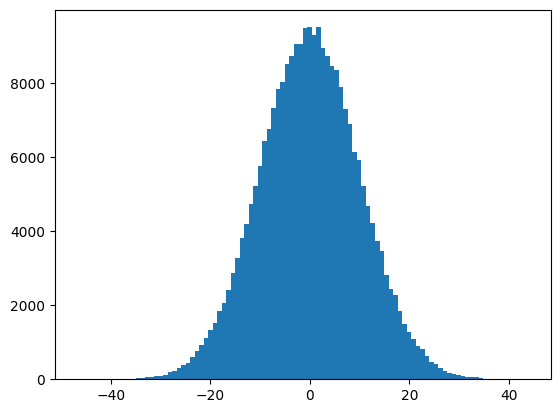

In [38]:
gray_flat = gray.flatten()
noise_flat= img_noise.flatten()
gaussian_noise_flat = noise.flatten()
plt.hist(gaussian_noise_flat,bins=100)
#plt.hist(noise_flat,bins=100)

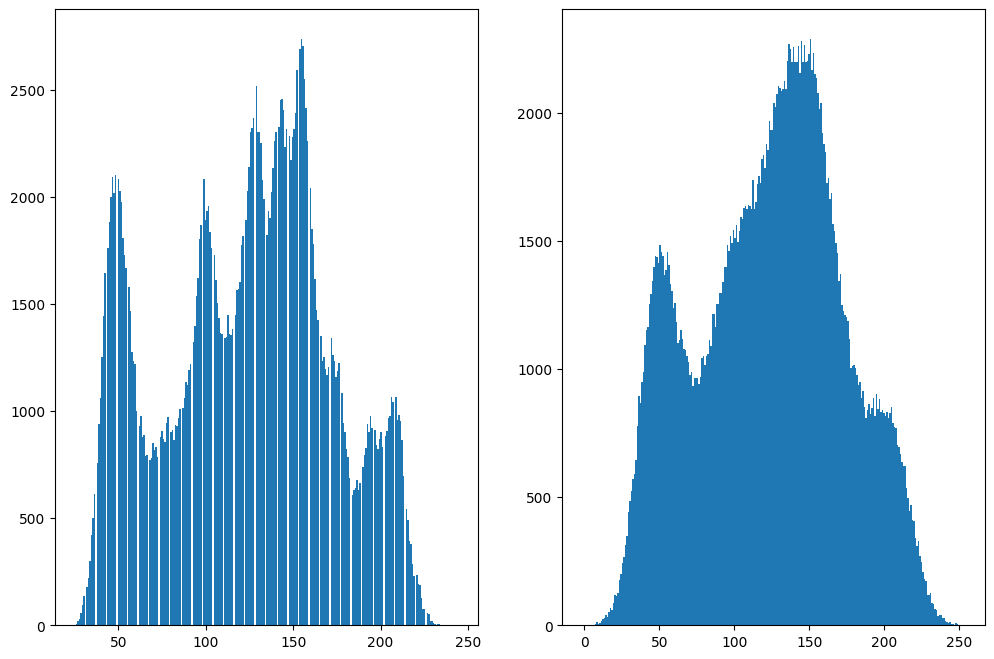

In [39]:
def get_histogram(img, bins = 100):#100개 구간으로 슬라이싱한 히스토그램 데이터입니다., density=True
    min_data = np.min(img)
    max_data = np.max(img)

    dx = (max_data - min_data) / bins #bins가 한번 돌아갈때마다 x축을 그리는 구간이 dx입니다.
    x = np.zeros(bins)
    y = np.zeros(bins+1)#for문이 0~bin까지 돌기 때문에 y 배열은 x배열보다 1 커야합니다.
    for i in range(bins):
        x[i] = i*dx + min_data
    #print(img.size)
    for j in img:
        #print(j)
        bin = int((j - min_data) / dx)
        #print(y)
        y[bin] += 1
    
    y[bins-2] += y[bins-1]
    y = y[:bins]

    plt.bar(x, y, width=dx)
    return np.column_stack((x, y))
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
hist =get_histogram(gray_flat,256)
plt.subplot(1,2,2)
hist2 = get_histogram(noise_flat, 256)

# plt.subplot(1,2,1)
# plt.plot(hist)
# plt.subplot(1,2,2)
# plt.plot(hist2)

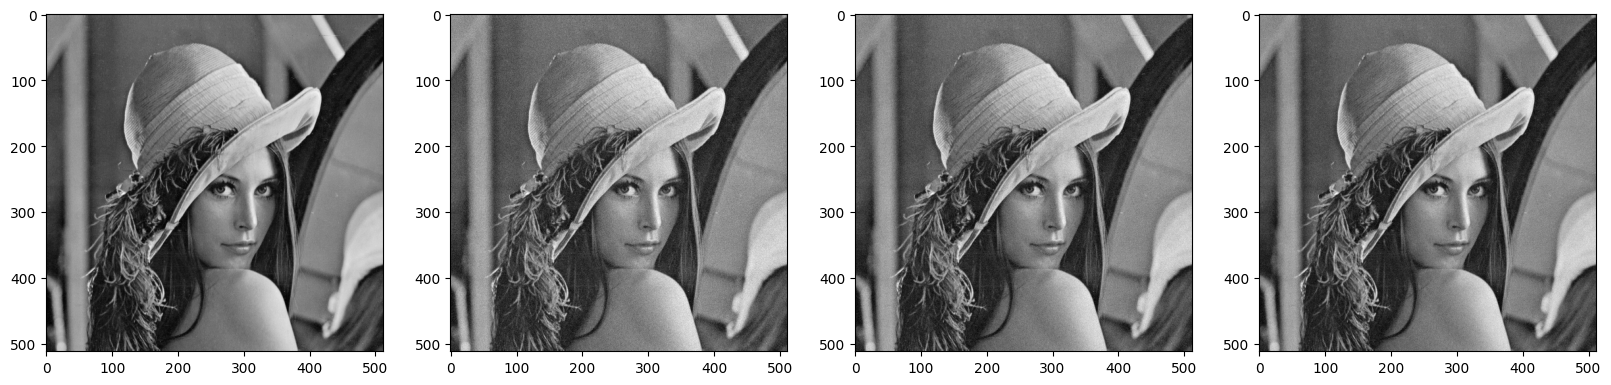

In [40]:
def scailing():
    #gray
    # img = cv2.imread('./Lenna.png')
    # plt.imshow([img])

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    height, width = gray.shape

    std = 10
    img_noise = make_noise(std, gray)
    img_noise2 = make_noise(std, gray)
    img_noise3 = make_noise(std, gray)
    img_noise4 = make_noise(std, gray)

    out2 = np.zeros((height, width), dtype=np.float)
    out3 = np.zeros((height, width), dtype=np.float)
    out4 = np.zeros((height, width), dtype=np.float)
    # 평균 계산
    for i in range(height):
        for j in range(width):
            if (img_noise[i][j] + img_noise2[i][j]) / 2 > 255:
                out2[i][j] = 255
            else:
                out2[i][j] = (img_noise[i][j] + img_noise2[i][j]) / 2

            if (img_noise[i][j] + img_noise2[i][j] + img_noise3[i][j]) / 3 > 255:
                out3[i][j] = 255
            else:
                out3[i][j] = (img_noise[i][j] + img_noise2[i][j] + img_noise3[i][j]) / 3

            if (img_noise[i][j] + img_noise2[i][j] + img_noise3[i][j] + img_noise4[i][j]) / 4 > 255:
                out4[i][j] = 255
            else:
                out4[i][j] = (img_noise[i][j] + img_noise2[i][j] + img_noise3[i][j] + img_noise4[i][j]) / 4

    plt.figure(figsize=(20,12))
    plt.subplot(1,4,1)
    plt.imshow(gray,cmap='gray')
    plt.subplot(1,4,2)
    plt.imshow(out2,cmap='gray')
    plt.subplot(1,4,3)
    plt.imshow(out3,cmap='gray')
    plt.subplot(1,4,4)
    plt.imshow(out4,cmap='gray')



scailing()